# Analysis of Aviation Accidents

There I try to find insights through analysing the data set that contains 82,635 aviation accidents that occurred in the U.S., and the metadata associated with them. 

The data in AviationData.txt file comes from the <a href='https://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx'>National Transportation Safety Board (NTSB)</a>.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

## Load and prepare data

In [44]:
df = pd.read_csv('AviationData.txt', delimiter='|')
df.columns = df.columns.str.strip()
for col in df.columns:
    df[col] = df[col].str.strip()

In [45]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
0,20181217X10943,Accident,GAA19CA098,12/16/2018,"Grangville, ID",United States,45.583611,-115.681667,PVT,,...,,,,,1,,,Preliminary,12/18/2018,
1,20181217X25746,Accident,GAA19CA097,12/15/2018,"MORIARTY, NM",United States,34.970000,-106.000000,0E0,MORIARTY MUNI,...,,,,,1,VMC,,Preliminary,12/20/2018,
2,20181213X41114,Accident,ERA19LA065,12/13/2018,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,,,,1,,VMC,APPROACH,Preliminary,12/21/2018,
3,20181213X45528,Accident,CEN19FA044,12/13/2018,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,,1,,,,VMC,TAKEOFF,Preliminary,12/19/2018,
4,20181214X90303,Accident,GAA19CA096,12/11/2018,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,,,,,1,VMC,,Preliminary,12/18/2018,


Remove useless columns such as 'Event Id', 'Accident Number', 'Report Status', 'Publication Date'.

In [46]:
df = df.drop(['Event Id', 'Accident Number', 'Report Status', 'Publication Date', 'Registration Number', 'Airport Code', 'Airport Name', 'FAR Description', ''], axis=1)

In [47]:
df['Investigation Type'].value_counts()

Accident    79289
Incident     3345
                1
Name: Investigation Type, dtype: int64

Here, I analyze only accident events, so remove Incident data and the columns itself.

In [48]:
df = df[df['Investigation Type'] == 'Accident'].drop('Investigation Type', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79289 entries, 0 to 82634
Data columns (total 22 columns):
Event Date                79289 non-null object
Location                  79289 non-null object
Country                   79289 non-null object
Latitude                  79289 non-null object
Longitude                 79289 non-null object
Injury Severity           79289 non-null object
Aircraft Damage           79289 non-null object
Aircraft Category         79289 non-null object
Make                      79289 non-null object
Model                     79289 non-null object
Amateur Built             79289 non-null object
Number of Engines         79289 non-null object
Engine Type               79289 non-null object
Schedule                  79289 non-null object
Purpose of Flight         79289 non-null object
Air Carrier               79289 non-null object
Total Fatal Injuries      79289 non-null object
Total Serious Injuries    79289 non-null object
Total Minor Injuries      7

In [49]:
df['Country'].value_counts(normalize=True)

United States         0.948152
                      0.005827
Canada                0.003090
Brazil                0.002964
Mexico                0.002901
Bahamas               0.002371
United Kingdom        0.002094
Australia             0.002068
France                0.001766
Germany               0.001703
Colombia              0.001564
Spain                 0.001148
Venezuela             0.001110
Ecuador               0.000921
Argentina             0.000883
Italy                 0.000870
Russia                0.000807
Japan                 0.000744
Dominican Republic    0.000732
Indonesia             0.000719
Guatemala             0.000681
Peru                  0.000668
Switzerland           0.000593
Austria               0.000555
South Africa          0.000542
New Zealand           0.000517
Chile                 0.000517
Ireland               0.000454
Costa Rica            0.000441
China                 0.000416
                        ...   
Mauritania            0.000013
Lebanon 

95% of data is for the United States, so remove data from other countries.

In [50]:
df = df[df['Country'] == 'United States'].drop('Country', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75178 entries, 0 to 82634
Data columns (total 21 columns):
Event Date                75178 non-null object
Location                  75178 non-null object
Latitude                  75178 non-null object
Longitude                 75178 non-null object
Injury Severity           75178 non-null object
Aircraft Damage           75178 non-null object
Aircraft Category         75178 non-null object
Make                      75178 non-null object
Model                     75178 non-null object
Amateur Built             75178 non-null object
Number of Engines         75178 non-null object
Engine Type               75178 non-null object
Schedule                  75178 non-null object
Purpose of Flight         75178 non-null object
Air Carrier               75178 non-null object
Total Fatal Injuries      75178 non-null object
Total Serious Injuries    75178 non-null object
Total Minor Injuries      75178 non-null object
Total Uninjured           7

In [51]:
df['Aircraft Category'].value_counts()

                     52511
Airplane             19529
Helicopter            2200
Glider                 427
Balloon                189
Weight-Shift            92
Gyrocraft               88
Powered Parachute       58
Gyroplane               48
Ultralight              25
Blimp                    4
Unknown                  4
Powered-Lift             2
Rocket                   1
Name: Aircraft Category, dtype: int64

Here, we consider accidents in the aerobus only.

In [52]:
df = df[(df['Aircraft Category'] == 'Airplane') | (df['Aircraft Category'] == '')].drop('Aircraft Category', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72040 entries, 0 to 82634
Data columns (total 20 columns):
Event Date                72040 non-null object
Location                  72040 non-null object
Latitude                  72040 non-null object
Longitude                 72040 non-null object
Injury Severity           72040 non-null object
Aircraft Damage           72040 non-null object
Make                      72040 non-null object
Model                     72040 non-null object
Amateur Built             72040 non-null object
Number of Engines         72040 non-null object
Engine Type               72040 non-null object
Schedule                  72040 non-null object
Purpose of Flight         72040 non-null object
Air Carrier               72040 non-null object
Total Fatal Injuries      72040 non-null object
Total Serious Injuries    72040 non-null object
Total Minor Injuries      72040 non-null object
Total Uninjured           72040 non-null object
Weather Condition         7

In [53]:
(df == '').sum()

Event Date                    0
Location                     20
Latitude                  48221
Longitude                 48229
Injury Severity               0
Aircraft Damage             887
Make                         10
Model                        24
Amateur Built                93
Number of Engines          1316
Engine Type                 686
Schedule                  64176
Purpose of Flight          1486
Air Carrier               69267
Total Fatal Injuries      20771
Total Serious Injuries    22134
Total Minor Injuries      20928
Total Uninjured            9920
Weather Condition           227
Broad Phase of Flight      2431
dtype: int64

Nearly almost values are empty in *Air Carrier* and *Schedule* features, so remove them.

In [54]:
df = df.drop(['Air Carrier', 'Schedule'], axis=1)

## Which company's airplanes cause accidents the most?

Text(0.5, 1.0, 'Accident percentage by Maker')

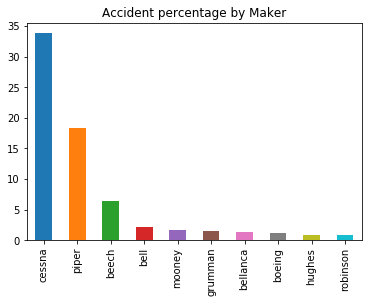

In [55]:
df['Make'] = df['Make'].str.lower()
accident_frequency = df['Make'].value_counts(normalize=True).head(10)*100
accident_frequency.plot.bar()
plt.title('Accident percentage by Maker')

** More than one third of aviation accidents happen in CESSNA planes.**
1. cessna      33.8%
2. piper       18.4%
3. beech        6.4%
4. bell         2.2%
5. mooney       1.7%
6. grumman      1.5%
7. bellanca     1.4%
8. boeing       1.2%
9. hughes       0.9%
10.robinson     0.8%

** Never take on CESSNA planes. **

## Which season/month accidents occur in?

In [56]:
df['Event Date'] = pd.to_datetime(df['Event Date'])
df.head()

,Event Date,Location,Latitude,Longitude,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight
0,2018-12-16,"Grangville, ID",45.583611,-115.681667,Non-Fatal,Substantial,cessna,170,No,1,,Positioning,,,,1,,
1,2018-12-15,"MORIARTY, NM",34.970000,-106.000000,Non-Fatal,Substantial,cessna,180,No,1,,Personal,,,,1,VMC,
2,2018-12-13,"Punta Gorda, FL",26.925278,-82.001111,Non-Fatal,Substantial,czech sport aircraft as,Piper Sport,No,1,Reciprocating,Personal,,,1,,VMC,APPROACH
3,2018-12-13,"Valparaiso, IN",41.451667,-87.004444,Fatal(1),Destroyed,piper,PA24,No,1,Reciprocating,Personal,1,,,,VMC,TAKEOFF
4,2018-12-11,"Hartford, WI",43.330278,-88.326111,Non-Fatal,Substantial,beech,36,No,1,,Personal,,,,1,VMC,


In [57]:
df['Year'] = df['Event Date'].dt.year
df['Month'] = df['Event Date'].dt.month

Text(0.5, 1.0, 'Accidents by month')

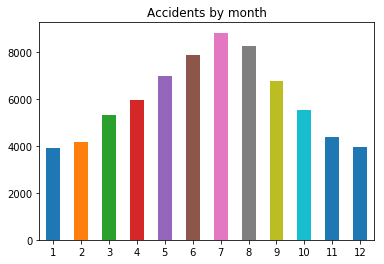

In [58]:
monthly = df['Month'].value_counts().sort_index(axis=0)
monthly.plot.bar()
plt.xticks(rotation=0)
plt.title('Accidents by month')

**Winter is a safe and summer is a dangerous season for flight.**

Text(0.5, 1.0, 'Change of yearly accidents')

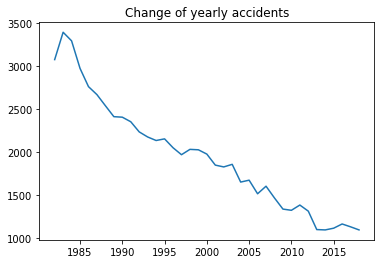

In [65]:
df[df['Year']>1981].loc[:, 'Year'].value_counts().sort_index().plot()
plt.title('Change of yearly accidents')

** Aviation accidents are decreasing as years gone by.**